In [ ]:
#Εισαγωγή βιβλιοθηκών

In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd #DataFrames
import matplotlib.pyplot as plt #Για τα γραφικά
from wordcloud import WordCloud #για τα wordclouds
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns #κάνει ομορφότερα τα γραφήματα (plot) 
import numpy as np
import glob
import spacy
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import itertools
import re
from nltk.stem import PorterStemmer
import nltk #για Επεξεργασία φυσικής γλώσσας Natural Language Toolkit
import scipy #Για διαφορές και αποστάσεις
import sklearn.manifold #Για manifold plot
from nltk.corpus import stopwords #Για stopwords
import json #Για API responses
import urllib.parse #Για ένωση urls
%matplotlib inline 
#Για να εμφανίζονται τα γραφήματα
from textblob import TextBlob #Aνάλυση συναισθήμτατος
from sklearn.feature_extraction.text import CountVectorizer #Vectorizing
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df= pd.read_csv("/content/gdrive/MyDrive/final-1.tsv", sep="\t")
df.head()

Unnamed: 0                                              Title  \
0           0  Υπόθεση Πάτρας: Διατάχθηκε πειθαρχικός έλεγχος...   
1           1  Υπόθεση Πάτρας - Τσιάρας: "Ξεκινά άμεσα πειθαρ...   
2           2  Ρούλα Πισπιρίγκου: Αστυνομικοί στο κελί της γι...   
3           3  Ρούλα Πισπιρίγκου: Καλείται ως μόνη ύποπτη για...   
4           4  Δεν είμαι ο Ηρακλής Πουαρό, είμαι ο Θανάσης Κα...   

                                                Href  \
0  https://www.news247.gr/koinonia/ypothesi-patra...   
1  https://www.news247.gr/koinonia/eglima/ypothes...   
2  https://www.news247.gr/koinonia/eglima/royla-p...   
3  https://www.news247.gr/koinonia/royla-pispirig...   
4  https://www.news247.gr/sunday-edition/den-eima...   

                                            Leadtext                      Tag  \
0  Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...                    ΠΑΤΡΑ   
1  Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...  ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ   
2  Η ύποπτη για τις δολοφονίες της Μαλένας και τη...  ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ   
3  Εξηγήσεις για τους θανάτους των δύο μικρότερων...        ΡΟΥΛΑ ΠΙΣΠΙΡΙΓΚΟΥ   
4  Ο άνθρωπος που αν δεν είχε γίνει αστυνομικός σ...               ΣΥΝΕΝΤΕΥΞΗ   

                Datetime  
0  04 Ιουλίου 2022 16:45  
1  02 Ιουλίου 2022 20:22  
2  30 Ιουνίου 2022 11:55  
3  29 Ιουνίου 2022 11:11  
4  25 Ιουνίου 2022 08:49

In [4]:
df

Unnamed: 0                                              Title  \
0             0  Υπόθεση Πάτρας: Διατάχθηκε πειθαρχικός έλεγχος...   
1             1  Υπόθεση Πάτρας - Τσιάρας: "Ξεκινά άμεσα πειθαρ...   
2             2  Ρούλα Πισπιρίγκου: Αστυνομικοί στο κελί της γι...   
3             3  Ρούλα Πισπιρίγκου: Καλείται ως μόνη ύποπτη για...   
4             4  Δεν είμαι ο Ηρακλής Πουαρό, είμαι ο Θανάσης Κα...   
..          ...                                                ...   
515         515  Πάτρα: Στην τελική ευθεία οι καταθέσεις γιατρώ...   
516         516  Φως στο Τούνελ: Η Αγγελική Νικολούλη επιστρέφε...   
517         517  Πάτρα - Θάνατος Τζωρτζίνας: Συνεχίζονται οι κα...   
518         518  Ρούλα Πισπιρίγκου: Νέα στοιχεία την "καίνε" γι...   
519         519  Πάτρα: Εντόπισαν τεχνικό υπολογιστών που "έσβη...   

                                                  Href  \
0    https://www.news247.gr/koinonia/ypothesi-patra...   
1    https://www.news247.gr/koinonia/eglima/ypothes...   
2    https://www.news247.gr/koinonia/eglima/royla-p...   
3    https://www.news247.gr/koinonia/royla-pispirig...   
4    https://www.news247.gr/sunday-edition/den-eima...   
..                                                 ...   
515  https://www.news247.gr/koinonia/patra-stin-tel...   
516  https://www.news247.gr/psixagogia/tileorasi/fo...   
517  https://www.news247.gr/koinonia/patra-thanatos...   
518  https://www.news247.gr/koinonia/eglima/royla-p...   
519  https://www.news247.gr/koinonia/patra-entopisa...   

                                              Leadtext  \
0    Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...   
1    Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...   
2    Η ύποπτη για τις δολοφονίες της Μαλένας και τη...   
3    Εξηγήσεις για τους θανάτους των δύο μικρότερων...   
4    Ο άνθρωπος που αν δεν είχε γίνει αστυνομικός σ...   
..                                                 ...   
515  Ολοκληρώνονται οι καταθέσεις γιατρών και νοσηλ...   
516  Επιστρέφει με νέο επεισόδιο την Παρασκευή (06/...   
517  Απαντήσεις για τη διαδρομή της κεταμίνης αναμέ...   
518  "Κλειδί" της εξιχνίασης της υπόθεσης θανάτου τ...   
519  Έναν τεχνικό Η/Υ που "συνεργαζόταν" με την Ρού...   

                         Tag                Datetime  
0                      ΠΑΤΡΑ   04 Ιουλίου 2022 16:45  
1    ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ   02 Ιουλίου 2022 20:22  
2    ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ   30 Ιουνίου 2022 11:55  
3          ΡΟΥΛΑ ΠΙΣΠΙΡΙΓΚΟΥ   29 Ιουνίου 2022 11:11  
4                 ΣΥΝΕΝΤΕΥΞΗ   25 Ιουνίου 2022 08:49  
..                       ...                     ...  
515  ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ     05 Μαΐου 2022 06:36  
516                    ΠΑΤΡΑ     04 Μαΐου 2022 09:43  
517                    ΠΑΤΡΑ     02 Μαΐου 2022 07:08  
518  ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ  30 Απριλίου 2022 20:44  
519                    ΠΑΤΡΑ  28 Απριλίου 2022 10:10  

[520 rows x 6 columns]

In [ ]:
#μετατροπή της ημερομηνίας από object σε datetime

In [5]:
df['Year'] = df.Datetime.apply(lambda dt: dt.split(' ')[2])
df['Month'] = df.Datetime.apply(lambda dt: dt.split(' ')[1])
df['Day'] = df.Datetime.apply(lambda dt: dt.split(' ')[0])
df['Time'] = df.Datetime.apply(lambda dt: dt.split(' ')[3])

months = {
    'Ιανουαρίου' : '01',
    'Φεβρουαρίου' : '02', 
    'Μαρτίου' : '03',
    'Απριλίου' : '04',
    'Μαΐου' : '05',
    'Ιουνίου': '06',
    'Ιουλίου' : '07',
    'Αυγούστου' : '08',
    'Σεπτεμβρίου' : '09',
    'Οκτωβρίου' : '10',
    'Νοεμβρίου' : '11',
    'Δεκεμβρίου' : '12',
     
}

df['Date'] = df.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
df['Date'] = pd.to_datetime(df['Date'])


df

Unnamed: 0                                              Title  \
0             0  Υπόθεση Πάτρας: Διατάχθηκε πειθαρχικός έλεγχος...   
1             1  Υπόθεση Πάτρας - Τσιάρας: "Ξεκινά άμεσα πειθαρ...   
2             2  Ρούλα Πισπιρίγκου: Αστυνομικοί στο κελί της γι...   
3             3  Ρούλα Πισπιρίγκου: Καλείται ως μόνη ύποπτη για...   
4             4  Δεν είμαι ο Ηρακλής Πουαρό, είμαι ο Θανάσης Κα...   
..          ...                                                ...   
515         515  Πάτρα: Στην τελική ευθεία οι καταθέσεις γιατρώ...   
516         516  Φως στο Τούνελ: Η Αγγελική Νικολούλη επιστρέφε...   
517         517  Πάτρα - Θάνατος Τζωρτζίνας: Συνεχίζονται οι κα...   
518         518  Ρούλα Πισπιρίγκου: Νέα στοιχεία την "καίνε" γι...   
519         519  Πάτρα: Εντόπισαν τεχνικό υπολογιστών που "έσβη...   

                                                  Href  \
0    https://www.news247.gr/koinonia/ypothesi-patra...   
1    https://www.news247.gr/koinonia/eglima/ypothes...   
2    https://www.news247.gr/koinonia/eglima/royla-p...   
3    https://www.news247.gr/koinonia/royla-pispirig...   
4    https://www.news247.gr/sunday-edition/den-eima...   
..                                                 ...   
515  https://www.news247.gr/koinonia/patra-stin-tel...   
516  https://www.news247.gr/psixagogia/tileorasi/fo...   
517  https://www.news247.gr/koinonia/patra-thanatos...   
518  https://www.news247.gr/koinonia/eglima/royla-p...   
519  https://www.news247.gr/koinonia/patra-entopisa...   

                                              Leadtext  \
0    Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...   
1    Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...   
2    Η ύποπτη για τις δολοφονίες της Μαλένας και τη...   
3    Εξηγήσεις για τους θανάτους των δύο μικρότερων...   
4    Ο άνθρωπος που αν δεν είχε γίνει αστυνομικός σ...   
..                                                 ...   
515  Ολοκληρώνονται οι καταθέσεις γιατρών και νοσηλ...   
516  Επιστρέφει με νέο επεισόδιο την Παρασκευή (06/...   
517  Απαντήσεις για τη διαδρομή της κεταμίνης αναμέ...   
518  "Κλειδί" της εξιχνίασης της υπόθεσης θανάτου τ...   
519  Έναν τεχνικό Η/Υ που "συνεργαζόταν" με την Ρού...   

                         Tag                Datetime  Year     Month Day  \
0                      ΠΑΤΡΑ   04 Ιουλίου 2022 16:45  2022   Ιουλίου  04   
1    ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ   02 Ιουλίου 2022 20:22  2022   Ιουλίου  02   
2    ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ   30 Ιουνίου 2022 11:55  2022   Ιουνίου  30   
3          ΡΟΥΛΑ ΠΙΣΠΙΡΙΓΚΟΥ   29 Ιουνίου 2022 11:11  2022   Ιουνίου  29   
4                 ΣΥΝΕΝΤΕΥΞΗ   25 Ιουνίου 2022 08:49  2022   Ιουνίου  25   
..                       ...                     ...   ...       ...  ..   
515  ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ     05 Μαΐου 2022 06:36  2022     Μαΐου  05   
516                    ΠΑΤΡΑ     04 Μαΐου 2022 09:43  2022     Μαΐου  04   
517                    ΠΑΤΡΑ     02 Μαΐου 2022 07:08  2022     Μαΐου  02   
518  ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ  30 Απριλίου 2022 20:44  2022  Απριλίου  30   
519                    ΠΑΤΡΑ  28 Απριλίου 2022 10:10  2022  Απριλίου  28   

      Time                Date  
0    16:45 2022-07-04 16:45:00  
1    20:22 2022-07-02 20:22:00  
2    11:55 2022-06-30 11:55:00  
3    11:11 2022-06-29 11:11:00  
4    08:49 2022-06-25 08:49:00  
..     ...                 ...  
515  06:36 2022-05-05 06:36:00  
516  09:43 2022-05-04 09:43:00  
517  07:08 2022-05-02 07:08:00  
518  20:44 2022-04-30 20:44:00  
519  10:10 2022-04-28 10:10:00  

[520 rows x 11 columns]

In [6]:
text = df['Leadtext'].str.cat(sep = ' ').replace("amp", ' ')

In [7]:
text

'Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικαστών που διερεύνησαν τα αίτια θανάτου των παιδιών στην Πάτρα, για πιθανή τέλεση παραπτωμάτων, παρήγγειλε ο υπουργός Δικαιοσύνης, Κώστας Τσιάρας. Τη διενέργεια πειθαρχικού ελέγχου των ιατροδικαστών που συνέταξαν τις πρώτες εκθέσεις για τον θάνατο της Μαλένας και της Ίριδας στην Πάτρα, προανήγγειλε ο υπουργός Δικαιοσύνης. Η ύποπτη για τις δολοφονίες της Μαλένας και της Ίριδας, θα ζητήσει να δοθεί εγγράφως η κατάθεσή μέσω του δικηγόρου της εντός ενός χρονικού διαστήματος 5-10 ημερών Εξηγήσεις για τους θανάτους των δύο μικρότερων παιδιών της, Ίριδας και Μαλένας καλείται να δώσει η Ρούλα Πισπιρίγκου. Πλέον κρίνεται ως η μόνη ύποπτη για τις ανθρωποκτονίες των τριών κοριτσιών. Ο άνθρωπος που αν δεν είχε γίνει αστυνομικός σήμερα θα ήταν ψυχολόγος, μιλά στο Magazine για τα χρόνια στην Αντιτρομοκρατική Υπηρεσία. Από την εξάρθρωση της "17 Νοέμβρη" και το φιάσκο με τον Σορίν Ματέι μέχρι την υπόθεση της Πάτρας και την... πολιτική. Ο τραγικός επίλογος 

In [8]:
df.columns

Index(['Unnamed: 0', 'Title', 'Href', 'Leadtext', 'Tag', 'Datetime', 'Year',
       'Month', 'Day', 'Time', 'Date'],
      dtype='object')

In [9]:
df.dtypes

Unnamed: 0             int64
Title                 object
Href                  object
Leadtext              object
Tag                   object
Datetime              object
Year                  object
Month                 object
Day                   object
Time                  object
Date          datetime64[ns]
dtype: object

In [12]:
plt.style.use('ggplot')

In [ ]:
df.groupby('Tag')['Tag'].value_counts().dropna().sort_values(ascending=True)[0:9].plot(kind = 'barh', figsize=(2,15))

Text(0, 0.5, 'Αριθμός άρθρων')

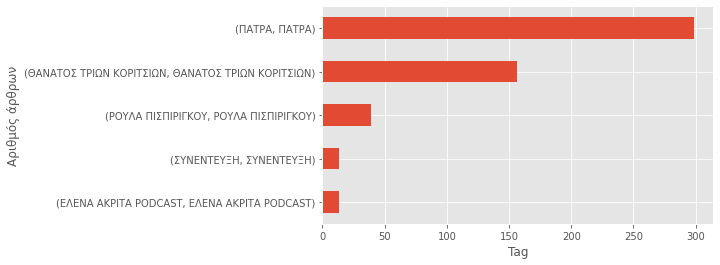

In [18]:
fig, ax = plt.subplots(figsize=(7,4))
df.groupby('Tag')['Tag'].value_counts().dropna().sort_values(ascending=True).plot(kind='barh', legend = False)
ax.set_xlabel('Tag')
ax.set_ylabel('Αριθμός άρθρων')

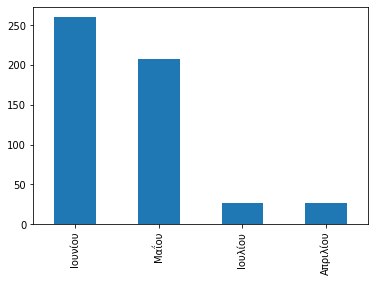

In [10]:
df['Month'].value_counts().plot(kind='bar')

In [ ]:
df['Tag'].value_counts(ascending = False)[0:9]

ΠΑΤΡΑ                      299
ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ    156
ΡΟΥΛΑ ΠΙΣΠΙΡΙΓΚΟΥ           39
ΣΥΝΕΝΤΕΥΞΗ                  13
ΕΛΕΝΑ ΑΚΡΙΤΑ PODCAST        13
Name: Tag, dtype: int64

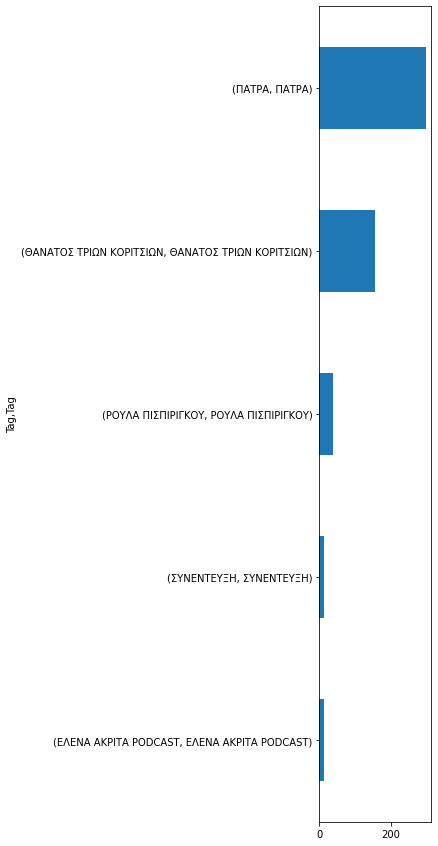

In [11]:
df.groupby('Tag')['Tag'].value_counts().dropna().sort_values(ascending=True)[0:9].plot(kind = 'barh', figsize=(2,15))

In [ ]:
df['Datetime'].value_counts().head(10)

04 Ιουλίου 2022 16:45    13
02 Ιουλίου 2022 20:22    13
30 Μαΐου 2022 13:29      13
27 Μαΐου 2022 22:43      13
26 Μαΐου 2022 17:43      13
17 Μαΐου 2022 14:41      13
16 Μαΐου 2022 17:44      13
14 Μαΐου 2022 09:22      13
13 Μαΐου 2022 17:46      13
12 Μαΐου 2022 17:31      13
Name: Datetime, dtype: int64

In [ ]:
df[['Tag']].groupby('Tag').count()

Empty DataFrame
Columns: []
Index: [ΕΛΕΝΑ ΑΚΡΙΤΑ PODCAST, ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ, ΠΑΤΡΑ, ΡΟΥΛΑ ΠΙΣΠΙΡΙΓΚΟΥ, ΣΥΝΕΝΤΕΥΞΗ]

In [ ]:
tag_data = df.groupby(['Tag']).count()['Title'].sort_values(ascending=False)


day_data = df.groupby(['Day']).count()['Title']
(day_data,tag_data)

(Day
 02    26
 04    26
 05    13
 07    13
 08    13
 09    13
 10    13
 11    13
 12    13
 13    13
 14    26
 16    39
 17    39
 18    13
 19    13
 20    26
 21    52
 22    26
 23    13
 25    26
 26    13
 27    13
 28    13
 29    13
 30    39
 Name: Title, dtype: int64, Tag
 ΠΑΤΡΑ                      299
 ΘΑΝΑΤΟΣ ΤΡΙΩΝ ΚΟΡΙΤΣΙΩΝ    156
 ΡΟΥΛΑ ΠΙΣΠΙΡΙΓΚΟΥ           39
 ΕΛΕΝΑ ΑΚΡΙΤΑ PODCAST        13
 ΣΥΝΕΝΤΕΥΞΗ                  13
 Name: Title, dtype: int64)

In [ ]:
#NRC Emotional Lexicon

In [ ]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [ ]:
df.shape

(520, 11)

In [ ]:
print("Number of articles scraped (before cleaning): ", df.shape[0])

Number of articles scraped (before cleaning):  520


In [ ]:
#Κάνουμε τις κενές τιμές 0

In [ ]:
df = df.replace(np.nan, '0')

In [ ]:
#Καθάρισμα κειμένου

In [ ]:
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [ ]:
df['tokenized'] = df['Leadtext'].map(lambda x: clean_text(x))

In [ ]:
df.Leadtext = [str (item) for item in df['Leadtext']]

In [ ]:
df['tokenized'] = df['Leadtext'].map(lambda x: clean_text(x))

In [ ]:
#Πόσες λέξεις υπάρχουν στα άρθρα

In [ ]:
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))
df['num_wds'].mean()

28.025

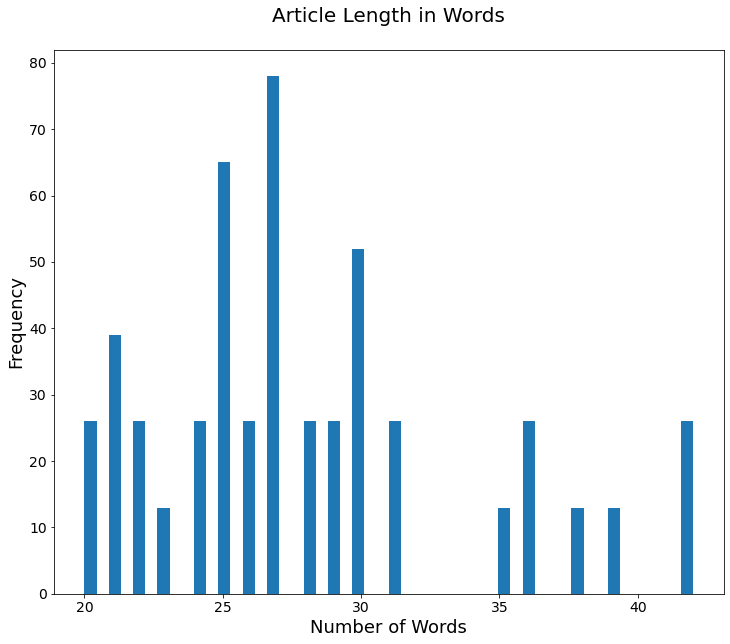

In [ ]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [ ]:
#Μοναδικές Λέξεις

In [ ]:
df['uniq_wds'] = df['tokenized'].str.split().apply(lambda x: len(set(x)))
df['uniq_wds'].head()

0    24
1    24
2    24
3    27
4    38
Name: uniq_wds, dtype: int64

In [ ]:
df['uniq_wds'].mean()

25.45

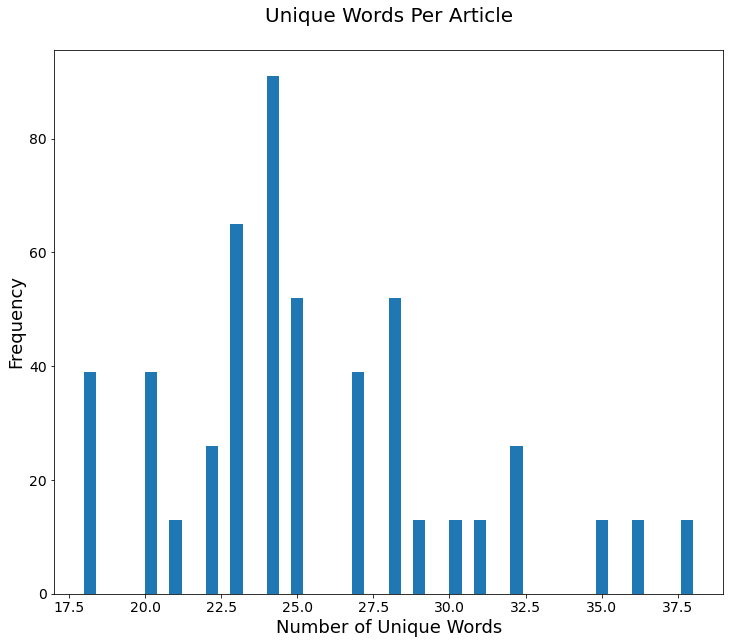

In [ ]:
ax=df['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [ ]:
#Stemming

In [ ]:
st = PorterStemmer()
df['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...
1      τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ...
2      η ύποπτη για τις δολοφονίες της μαλένας και τη...
3      εξηγήσεις για τους θανάτους των δύο μικρότερων...
4      ο άνθρωπος που αν δεν είχε γίνει αστυνομικός σ...
                             ...                        
515    ολοκληρώνονται οι καταθέσεις γιατρών και νοσηλ...
516    επιστρέφει με νέο επεισόδιο την παρασκευή 0605...
517    απαντήσεις για τη διαδρομή της κεταμίνης αναμέ...
518    κλειδί της εξιχνίασης της υπόθεσης θανάτου της...
519    έναν τεχνικό ηυ που συνεργαζόταν με την ρούλα ...
Name: tokenized, Length: 520, dtype: object

In [ ]:
#Tokenizing-spaCy

In [ ]:
!python -m spacy download el_core_news_sm

2022-09-15 17:05:46.915373: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 4.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
doc = nlp(text)
tokens = [token.lemma_ for token in doc]
tokens

['Τη',
 'διενέργεια',
 'πειθαρχικός',
 'ελέγχου',
 'ο',
 'ιατροδικαστής',
 'που',
 'διερεύνησαν',
 'ο',
 'αίτιο',
 'θανάτου',
 'ο',
 'παιδιών',
 'σε ο',
 'Πάτρα',
 ',',
 'για',
 'πιθανή',
 'τέλεση',
 'παραπτωμάτων',
 ',',
 'παρήγγειλε',
 'ο',
 'υπουργός',
 'δικαιοσύνη',
 ',',
 'Κώστας',
 'Τσιάρας',
 '.',
 'Τη',
 'διενέργεια',
 'πειθαρχικός',
 'ελέγχου',
 'ο',
 'ιατροδικαστής',
 'που',
 'συνέταξαν',
 'ο',
 'πρώτος',
 'έκθεση',
 'για',
 'ο',
 'θάνατος',
 'ο',
 'Μαλένα',
 'και',
 'ο',
 'Ίριδας',
 'σε ο',
 'Πάτρα',
 ',',
 'προανήγγειλε',
 'ο',
 'υπουργός',
 'δικαιοσύνη',
 '.',
 'ο',
 'ύποπτος',
 'για',
 'ο',
 'δολοφονία',
 'ο',
 'Μαλένα',
 'και',
 'ο',
 'Ίριδας',
 ',',
 'θα',
 'ζητώ',
 'να',
 'δοθεί',
 'εγγράφως',
 'ο',
 'κατάθεσή',
 'μέσω',
 'ο',
 'δικηγόρο',
 'μου',
 'εντός',
 'ένας',
 'χρονικός',
 'διαστήμα',
 '5-10',
 'ημερών',
 'Εξηγήσεις',
 'για',
 'ο',
 'θανάτους',
 'ο',
 'δύο',
 'μικρότερος',
 'παιδιών',
 'μου',
 ',',
 'Ίριδας',
 'και',
 'Μαλένα',
 'καλείται',
 'να',
 'δίνω',
 'ο',

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['όσα',
 'δικούς',
 'δηλαδή',
 'μέχρι',
 'πολύ',
 'τελικά',
 'πρέπει',
 'οσουδήποτε',
 'τούτοις',
 'έχει',
 'πόση',
 'αναμεταξύ',
 'κανείς',
 'υπό',
 'αφότου',
 'όσου',
 'άρα',
 'εαυτόν',
 'χωρίς',
 'οσησδήποτε']

In [ ]:
#WordCloud

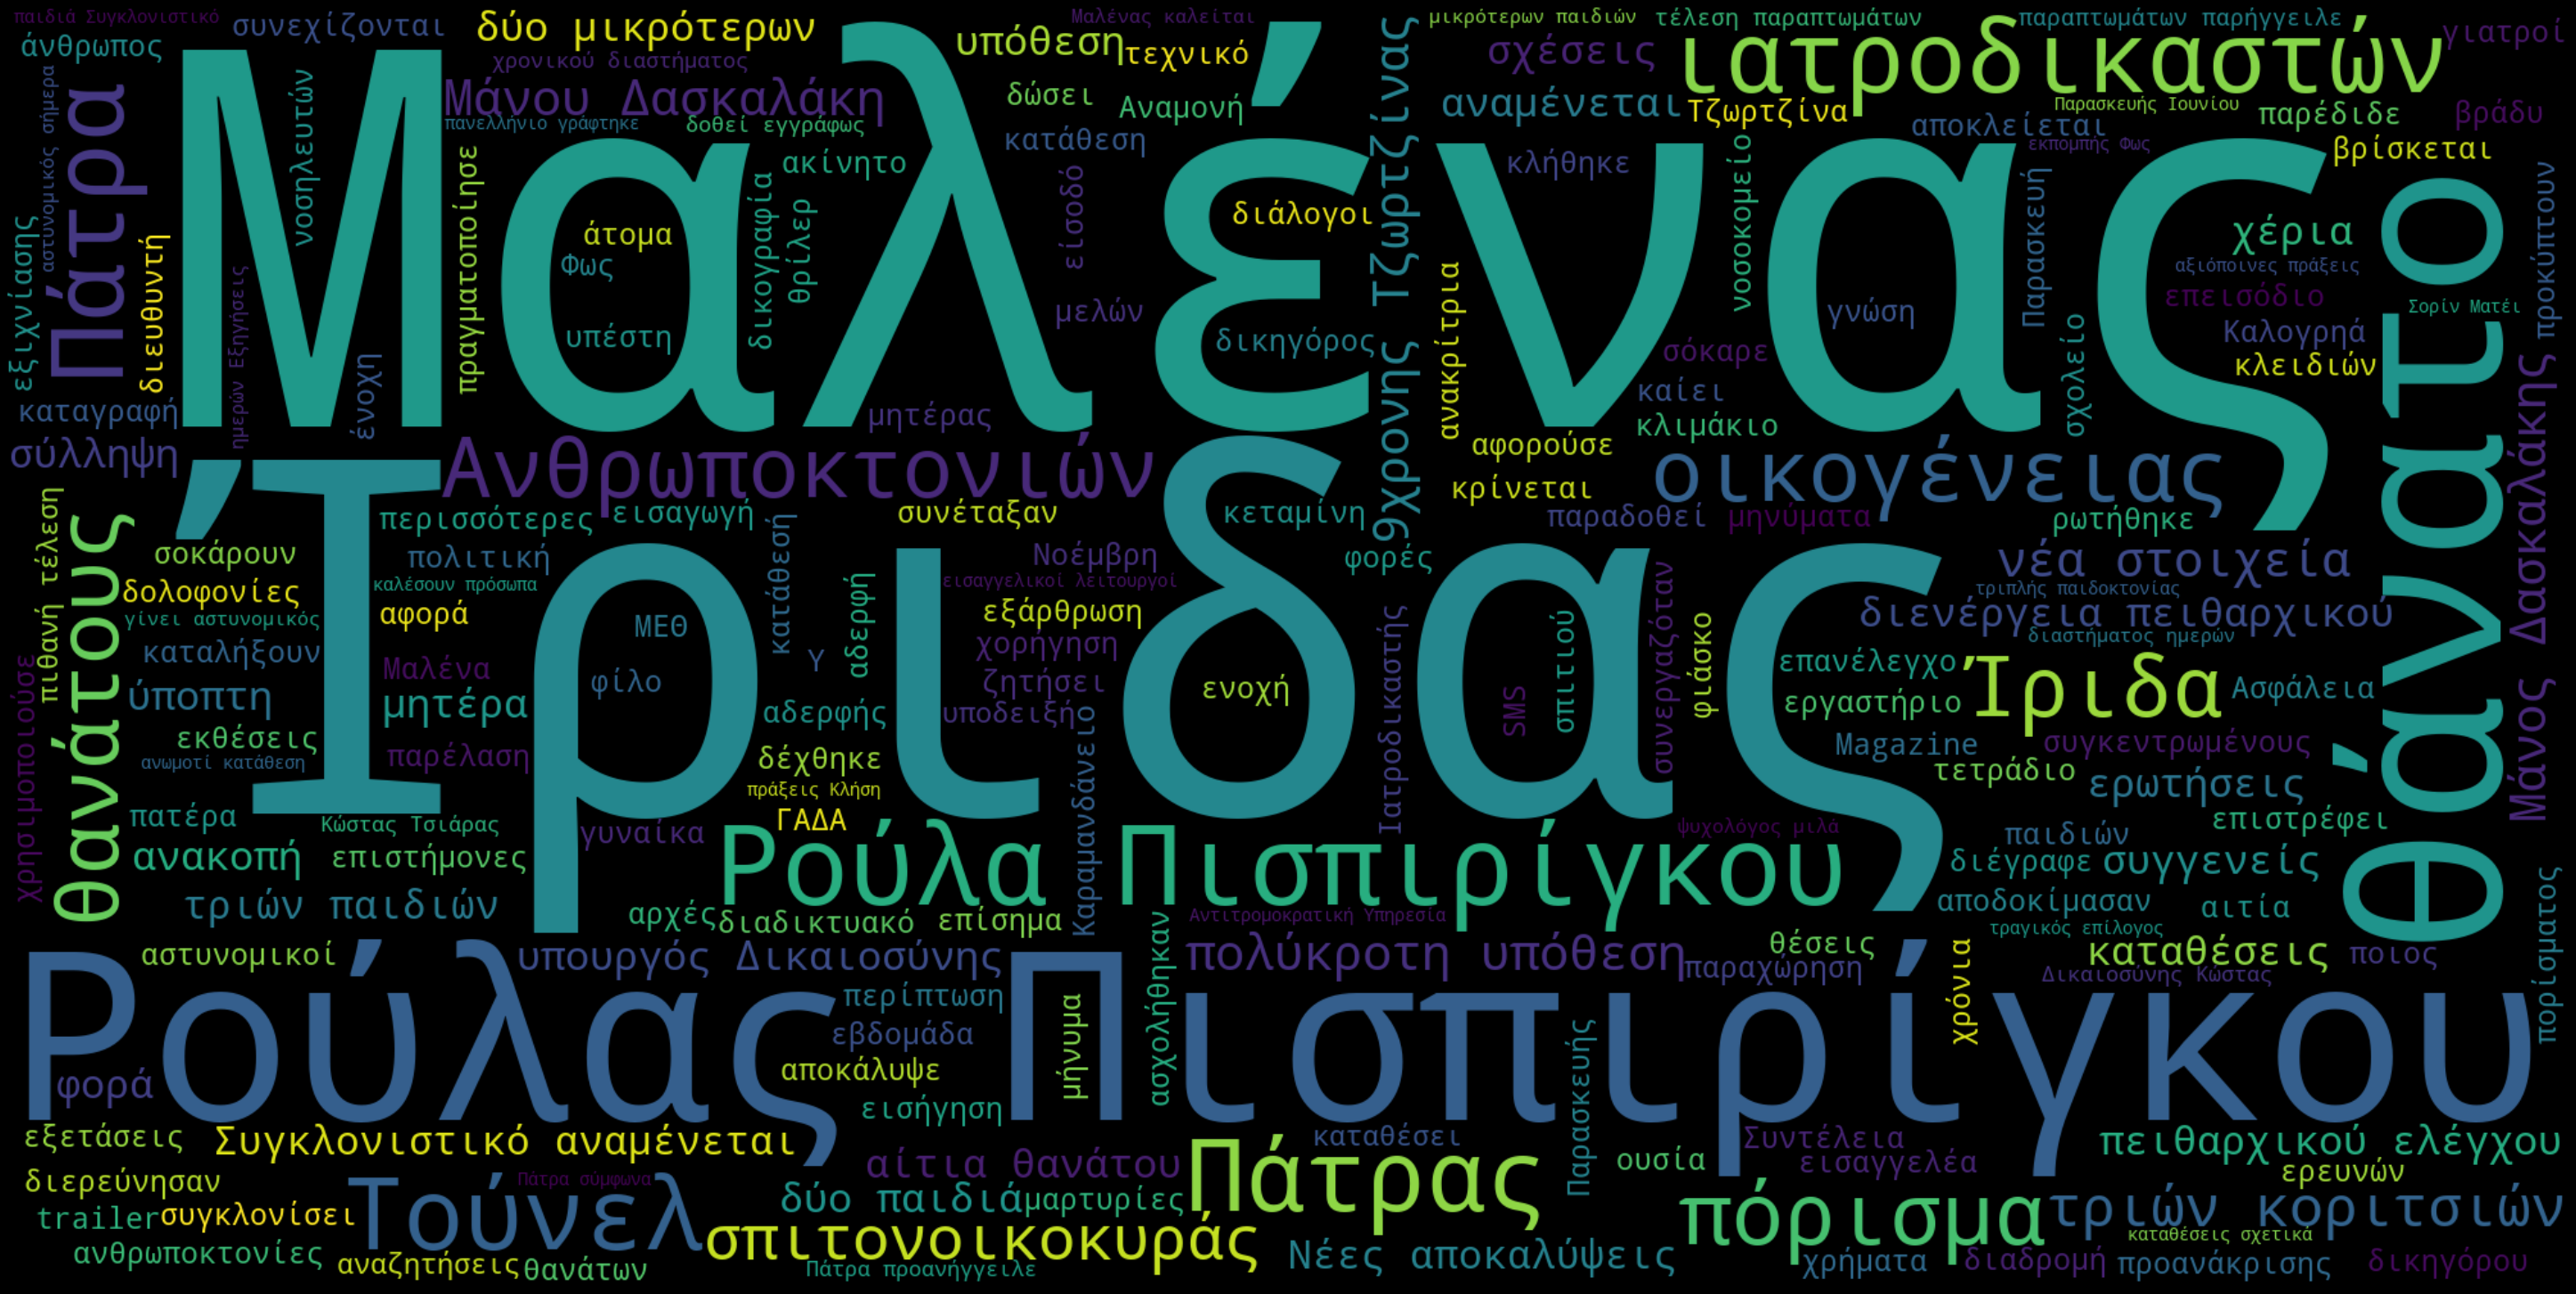

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Ανάλυση συναισθήματος με TextBlob

In [ ]:
phrases = (df['Leadtext'])
for phrase in phrases:
    doc = nlp(phrase)
    print("The sentiment for", doc, "is", doc[0].sentiment)

In [ ]:
words = (tokens)
for word in words:
    blob = TextBlob(word)
    print("The sentiment for", word, "is", blob.sentiment)

In [ ]:
#TextBlob

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

In [ ]:
#WordCloud2

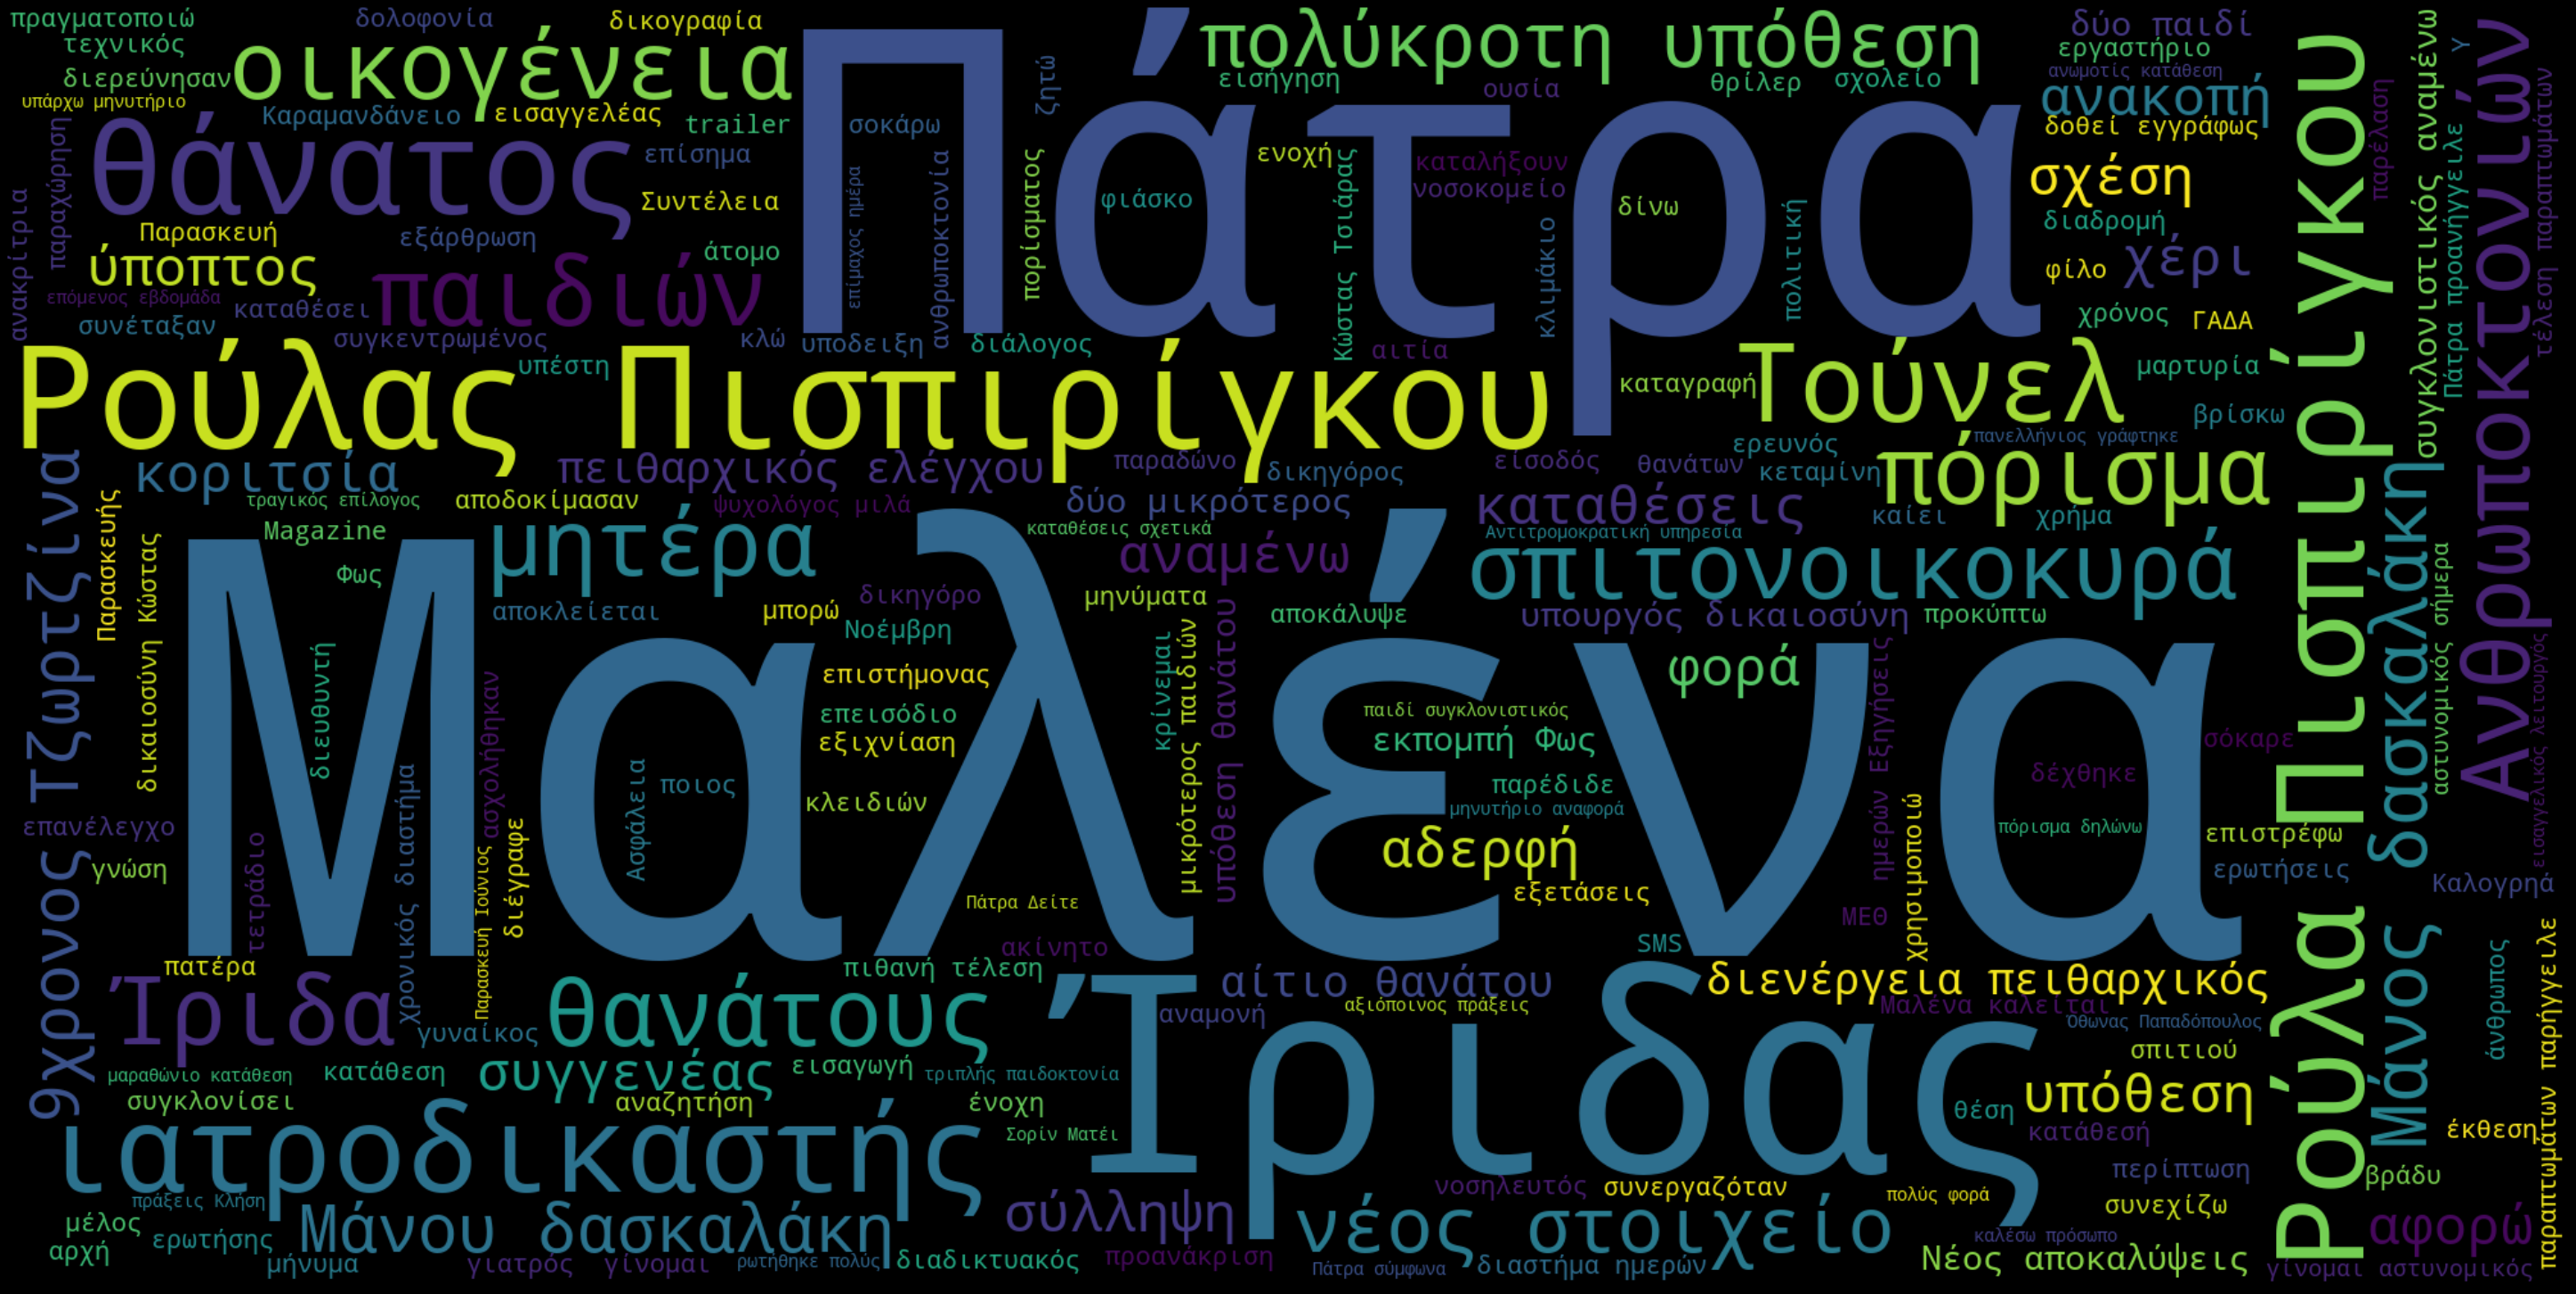

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#VECTORIZATION

In [ ]:
cv = CountVectorizer() #μέτρημα λέξεων

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

NameError: ignored

In [ ]:
matrix = vec.fit_transform(phrases) #μέτρημα εκφράσεων
matrix

In [ ]:
matrix.toarray()

In [ ]:
pd.DataFrame(matrix.toarray())

In [ ]:
vec.get_feature_names()

In [ ]:
docs = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [ ]:
#docs.sort_values(by='text', ascending=False)

In [ ]:
#NRC

In [ ]:
greeknrc = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(greeknrc)
emolex_df.head()

In [ ]:
emolex_df.tail()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

In [ ]:
df.head()

In [ ]:
short_df = df[['Title','tokenized','Date' ]]

In [ ]:
short_df

In [ ]:
short_df['tokenized'] = short_df['tokenized'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
short_df

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
emolex_df.tail

In [ ]:
matrix = vec.fit_transform(short_df['tokenized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
print(matrix)

  (0, 10739)	1
  (0, 11803)	1
  (1, 10739)	1
  (2, 3334)	1
  (2, 5360)	1
  (3, 3452)	1
  (4, 1965)	1
  (4, 4013)	1
  (4, 8414)	1
  (4, 9079)	1
  (4, 10641)	1
  (4, 10767)	1
  (4, 10899)	1
  (4, 11341)	1
  (4, 11457)	1
  (5, 4171)	1
  (5, 10357)	1
  (6, 3452)	1
  (6, 3490)	1
  (6, 5360)	1
  (6, 5641)	1
  (6, 7741)	1
  (6, 8835)	1
  (7, 4251)	1
  (7, 10767)	1
  :	:
  (512, 11805)	1
  (514, 6086)	1
  (514, 7093)	1
  (514, 8021)	1
  (514, 11803)	1
  (515, 8106)	1
  (515, 9542)	1
  (515, 11295)	1
  (516, 3704)	1
  (516, 4251)	1
  (516, 4392)	1
  (516, 7946)	1
  (516, 11090)	1
  (517, 31)	1
  (517, 506)	1
  (517, 2993)	1
  (517, 12602)	1
  (517, 13119)	1
  (518, 5665)	1
  (518, 7207)	1
  (518, 7619)	1
  (518, 7738)	1
  (518, 11295)	1
  (519, 1894)	1
  (519, 10765)	1


In [ ]:
wordcount_df.shape

(520, 13161)

In [ ]:
emolex_df.head()

index             word  Positive  Negative  Anger  Anticipation  Disgust  \
0      0            αφεση       1.0       0.0    0.0           0.0      0.0   
1      1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   
2      2          εχοντας       0.0       0.0    0.0           0.0      0.0   
3      3              εχω       0.0       0.0    0.0           0.0      0.0   
4      4             οριο       0.0       0.0    0.0           0.0      0.0   

   Fear  Joy  Sadness  Surprise  Trust  
0   0.0  0.0      0.0       0.0    0.0  
1   0.0  0.0      0.0       0.0    0.0  
2   0.0  0.0      0.0       0.0    0.0  
3   0.0  0.0      0.0       0.0    0.0  
4   0.0  0.0      0.0       0.0    0.0

In [ ]:
emolex_df.tail()

index          word  Positive  Negative  Anger  Anticipation  Disgust  \
13156  13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   
13157  13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   
13158  13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   
13159  13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   
13160  13170          ζουμ       0.0       0.0    0.0           0.0      0.0   

       Fear  Joy  Sadness  Surprise  Trust  
13156   1.0  0.0      0.0       1.0    0.0  
13157   0.0  0.0      0.0       0.0    0.0  
13158   0.0  0.0      0.0       0.0    0.0  
13159   0.0  0.0      0.0       0.0    0.0  
13160   0.0  0.0      0.0       0.0    0.0

In [ ]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
short_df.head(3)

Title  \
0  Υπόθεση Πάτρας: Διατάχθηκε πειθαρχικός έλεγχος...   
1  Υπόθεση Πάτρας - Τσιάρας: "Ξεκινά άμεσα πειθαρ...   
2  Ρούλα Πισπιρίγκου: Αστυνομικοί στο κελί της γι...   

                                           tokenized                Date  
0  τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ... 2022-07-04 16:45:00  
1  τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ... 2022-07-02 20:22:00  
2  η ύποπτη για τις δολοφονίες της μαλένας και τη... 2022-06-30 11:55:00

In [ ]:
short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_df['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_df['joy'] = wordcount_df[joy_words].sum(axis=1)


short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_df['trust'] = wordcount_df[trust_words].sum(axis=1)


short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
short_df

Title  \
0    Υπόθεση Πάτρας: Διατάχθηκε πειθαρχικός έλεγχος...   
1    Υπόθεση Πάτρας - Τσιάρας: "Ξεκινά άμεσα πειθαρ...   
2    Ρούλα Πισπιρίγκου: Αστυνομικοί στο κελί της γι...   
3    Ρούλα Πισπιρίγκου: Καλείται ως μόνη ύποπτη για...   
4    Δεν είμαι ο Ηρακλής Πουαρό, είμαι ο Θανάσης Κα...   
..                                                 ...   
515  Πάτρα: Στην τελική ευθεία οι καταθέσεις γιατρώ...   
516  Φως στο Τούνελ: Η Αγγελική Νικολούλη επιστρέφε...   
517  Πάτρα - Θάνατος Τζωρτζίνας: Συνεχίζονται οι κα...   
518  Ρούλα Πισπιρίγκου: Νέα στοιχεία την "καίνε" γι...   
519  Πάτρα: Εντόπισαν τεχνικό υπολογιστών που "έσβη...   

                                             tokenized                Date  \
0    τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ... 2022-07-04 16:45:00   
1    τη διενέργεια πειθαρχικού ελέγχου των ιατροδικ... 2022-07-02 20:22:00   
2    η ύποπτη για τις δολοφονίες της μαλένας και τη... 2022-06-30 11:55:00   
3    εξηγήσεις για τους θανάτους των δύο μικρότερων... 2022-06-29 11:11:00   
4    ο άνθρωπος που αν δεν είχε γίνει αστυνομικός σ... 2022-06-25 08:49:00   
..                                                 ...                 ...   
515  ολοκληρώνονται οι καταθέσεις γιατρών και νοσηλ... 2022-05-05 06:36:00   
516  επιστρέφει με νέο επεισόδιο την παρασκευή 0605... 2022-05-04 09:43:00   
517  απαντήσεις για τη διαδρομή της κεταμίνης αναμέ... 2022-05-02 07:08:00   
518  κλειδί της εξιχνίασης της υπόθεσης θανάτου της... 2022-04-30 20:44:00   
519  έναν τεχνικό ηυ που συνεργαζόταν με την ρούλα ... 2022-04-28 10:10:00   

     anger  positivity  joy  disgust  surprise  trust  anticipation  sadness  \
0        0           0    0        0         0      0             0        0   
1        0           0    0        0         0      0             0        0   
2        0           0    0        0         0      0             0        0   
3        0           0    0        0         0      0             0        0   
4        1           1    0        0         1      2             1        2   
..     ...         ...  ...      ...       ...    ...           ...      ...   
515      0           1    1        0         0      1             1        0   
516      0           0    0        0         0      0             1        0   
517      0           0    0        0         0      0             0        0   
518      0           3    2        0         0      2             2        1   
519      0           0    0        0         0      0             0        0   

     negative  fear  
0           0     0  
1           0     0  
2           0     0  
3           0     0  
4           3     2  
..        ...   ...  
515         1     1  
516         0     0  
517         0     1  
518         1     1  
519         0     0  

[520 rows x 13 columns]

In [ ]:
short_df.set_index('Date' , inplace=True)

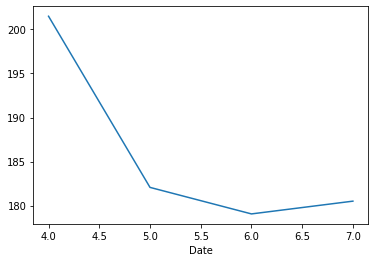

In [ ]:
short_df['tokenized'].str.len().groupby(by=short_df.index.month).mean().plot() 

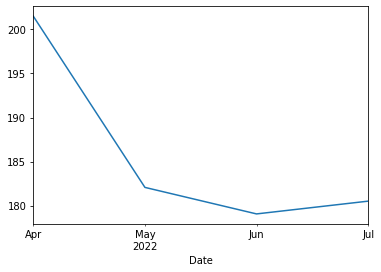

In [ ]:
short_df['tokenized'].str.len().resample('M').mean().plot()

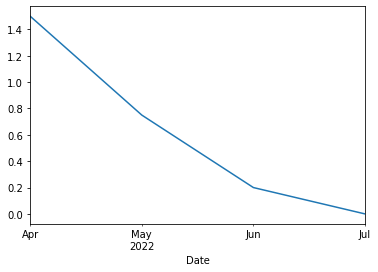

In [ ]:
short_df['positivity'].resample('M').mean().plot()

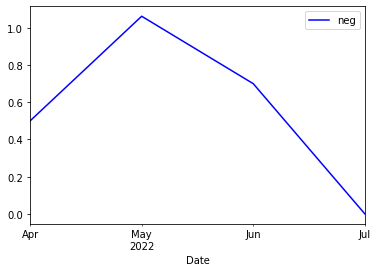

In [ ]:
short_df['negative'].resample('M').mean().plot(color = 'b',label = 'neg').legend() 

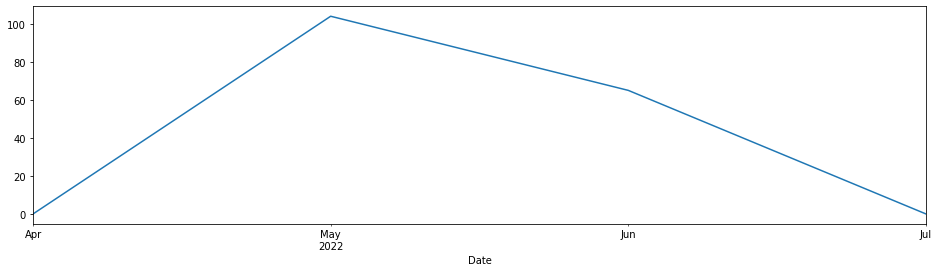

In [ ]:
short_df['anger'].resample('M').sum().plot(figsize=(16,4))

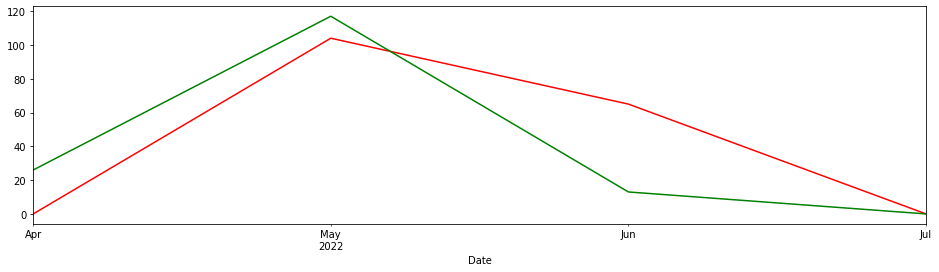

In [ ]:
ax = short_df['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_df['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

In [ ]:
ax = short_df['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_df['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_df['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

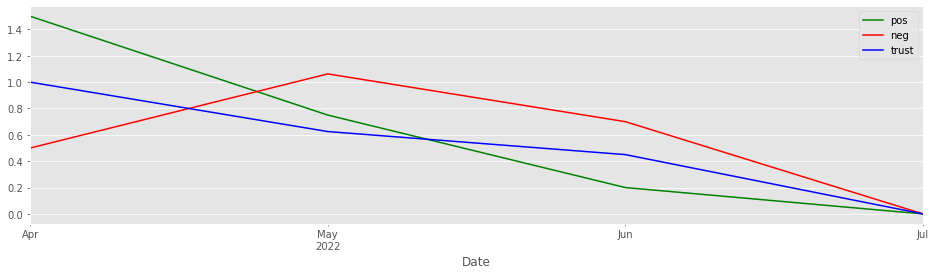

In [ ]:
ax = short_df['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_df['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_df['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

In [ ]:
#cosine similarity

In [ ]:
result = cosine_similarity(matrix)

In [ ]:
print(result)

[[1.         0.70710678 0.         ... 0.         0.         0.        ]
 [0.70710678 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
#heatmap

In [ ]:
type(result)

numpy.ndarray

In [ ]:
matrix.shape

(520, 13161)

In [ ]:
np.max(result)

1.0000000000000002

In [ ]:
np.min(result)

0.0

In [ ]:
plt.imshow( result )

In [ ]:
sns.heatmap(result, annot=True, fmt="d")

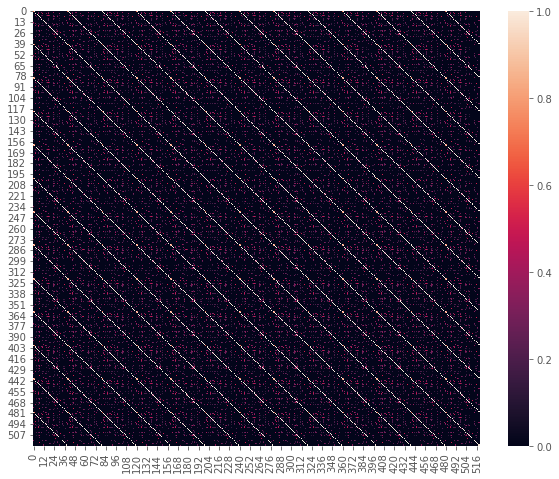

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(result)
plt.show()